# Ising Model in 2 Dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'svg'

This specifies the sizeof the lattice used for simulation; in this case we are using a 50x50 lattice.

In [2]:
size = 50

Creates the lattices used for simulation. The first lattice has more -1 values initially and the second lattice has more +1 values initially. We shall see how this effects the final equilibrium- specifically when there are two stable branches.

In [3]:
lattice_n = np.random.random((size,size))
for i in range(size):
    for j in range(size):
        if lattice_n[i,j]>=0.75:
            lattice_n[i,j]=1
        if lattice_n[i,j]<0.75:
            lattice_n[i,j]=-1
            
lattice_p = np.random.random((size,size))
for i in range(size):
    for j in range(size):
        if lattice_p[i,j]>=0.25:
            lattice_p[i,j]=1
        if lattice_p[i,j]<0.25:
            lattice_p[i,j]=-1

A function used to sum over all the $\sigma$ values. Despite being called "get_mag", it does not normalize by the number of points; that is done elsewhere.

In [4]:
def get_mag(arr):
    tot = sum(sum(arr))
    return tot           

Compute one terms in the sum

$$\sum_{<i,j>} \sigma_i \sigma_j$$

and takes into account boundary conditions when there is no nearest neighbour (on the sides of the lattice). We don't include the extra factor of $2$ in "get_delta_E" (counting each line segment twice) because the Hamiltonian is

$$H=-\frac{J}{2}\sum \sigma_i \sigma_j $$

so the 2s cancel out.

In [5]:
def compute_nn(arr, x, y):
    
    if x>=size or y>=size or x<0 or y<0:
        return 0
    
    pnt = arr[x,y]
    contrib = 0
    
    if x>0:
        contrib += pnt*arr[x-1,y]
    if x<size-1:
        contrib += pnt*arr[x+1,y]
    if y>0:
        contrib += pnt*arr[x,y-1]
    if y<size-1:
        contrib += pnt*arr[x,y+1]
    return -contrib

def get_delta_E(arr, new_arr, x, y):
    
    e_init = compute_nn(arr, x, y)    
    e_fin = compute_nn(new_arr, x, y)
                  
    return e_fin-e_init

This function swaps one of the spins on the lattice at random and then computes the change in energy. As discussed in class:

If $\Delta E \leq 0$ then we accept the new state

If $\Delta E > 0$ then we accept the new state with probability $e^{-\beta \Delta E}$.

In [6]:
def time_step(arr, BJ):
    
    pnt_swap = (np.random.randint(0,size), np.random.randint(0,size))
    new_arr = arr.copy(); new_arr[pnt_swap[0], pnt_swap[1]] *= -1
    
    delta_E = get_delta_E(arr, new_arr, pnt_swap[0], pnt_swap[1])
    
    if delta_E <= 0:
        return new_arr
    
    if delta_E>0:
        accept_prob = np.exp(-BJ*delta_E)
        a = np.random.random()
        if a < accept_prob:
            return new_arr
        else:
            return arr

This function gives time evolution; 

<ul>
  <li>Computes Magnetization of Lattice</li>
  <li>Does the spin flip (one time step) and checks for the acceptance of the new state</li>
  <li>These two steps are repeated $N$ times over, to give and array of the magnetization $m$ values.</li>
</ul>

In [7]:
def time_evol(arr, BJ, N):
    mag = np.zeros(N)
    for i in range(N):
        arr = time_step(arr, BJ)
        mag[i] = get_mag(arr)
    return mag/(size*size)

Create an array of $\beta J$ values to try when plotting the mean magnetization $\bar{m}$.

In [8]:
BJs = np.arange(0.1, 2, 0.05)

The code Below stores the data obtained in DataFrames because the code takes a long time to run and its safer to store the data in pickles and reload later rather than have to run the code every time.

Negative magnetization initial condition:

In [9]:
df_n = pd.DataFrame(columns = ['BetaJ', 'Array', 'mbar'])
df_n['BetaJ']=BJs

# This line of code takes a long time to run; only run once then save
##################################
'''
df_n['Array'] = df_n['BetaJ'].apply(lambda x: time_evol(lattice_n,
                                                    x, 500000))
df_n.to_pickle("data_neg_lattice.pkl")
'''
##################################

df_n = pd.read_pickle("data_neg_lattice.pkl")

Positive magnetization intial condition:

In [10]:
df_p = pd.DataFrame(columns = ['BetaJ', 'Array', 'mbar'])
df_p['BetaJ']=BJs

# This line of code takes a long time to run; only run once then saveb
##################################
'''
df_p['Array'] = df_p['BetaJ'].apply(lambda x: time_evol(lattice_p,
                                                    x, 500000))
df_p.to_pickle("data_pos_lattice.pkl")
'''
##################################

df_p = pd.read_pickle("data_pos_lattice.pkl")

Plot time evolution of magnetization for different values of $\beta J$.

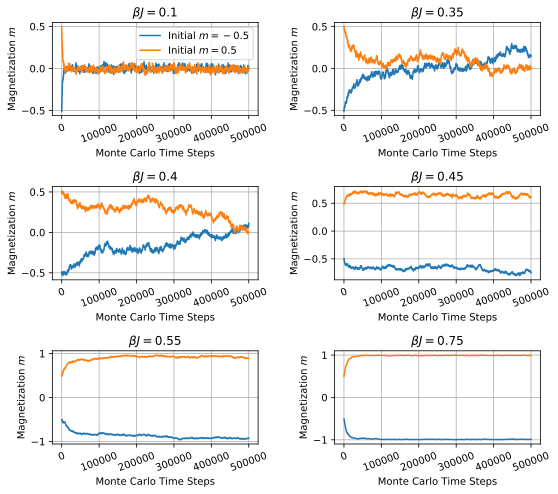

In [11]:
fig, ax = plt.subplots(3,2, figsize=(8,7))

ax[0,0].plot(df_n['Array'][0], label='Initial $m=-0.5$')
ax[0,0].plot(df_p['Array'][0], label='Initial $m=0.5$')

ax[0,1].plot(df_n['Array'][5])
ax[0,1].plot(df_p['Array'][5])

ax[1,0].plot(df_n['Array'][6])
ax[1,0].plot(df_p['Array'][6])

ax[1,1].plot(df_n['Array'][7])
ax[1,1].plot(df_p['Array'][7])

ax[2,0].plot(df_n['Array'][9])
ax[2,0].plot(df_p['Array'][9])

ax[2,1].plot(df_n['Array'][13])
ax[2,1].plot(df_p['Array'][13])

ax[0,0].set_title(r'$\beta J = 0.1$')
ax[0,1].set_title(r'$\beta J = 0.35$')
ax[1,0].set_title(r'$\beta J = 0.4$')
ax[1,1].set_title(r'$\beta J = 0.45$')
ax[2,0].set_title(r'$\beta J = 0.55$')
ax[2,1].set_title(r'$\beta J = 0.75$')

[a.grid() for a in ax.ravel()]
[a.set_ylabel('Magnetization $m$') for a in ax.ravel()]
[a.set_xlabel('Monte Carlo Time Steps') for a in ax.ravel()]

ax[0, 0].legend()

[plt.setp(a.xaxis.get_majorticklabels(), rotation=20) for a in ax.ravel()]
fig.tight_layout()
plt.show()

**Monte Carlo time required to reach equilbirium**: In the extreme cases where the magnetization approaches either 0 or 1, it takes about 30000 time steps to reach an equilbrium value. In the intermediate cases, however, it can be seen that the curves never seem to approach a distinct equilbrium value. This is due to the fact that this region of $\beta J$ values is representative of a phase change occuring.

Note that the lattice with the negative magnetization as its initial condition approaches $-1$ at high $\beta J$ values but the lattice with the positive magnetization approaches $+1$ at high $\beta J$ values. This implies two stable conditions at high $\beta J$ values: all spins pointing up or all spins pointing down.

Observe what happens in the extreme cases when we start either closer to or farther from equilbrium:

In [12]:
lattice_1 = np.random.random((size,size))
for i in range(size):
    for j in range(size):
        if lattice_1[i,j]>=0.9:
            lattice_1[i,j]=1
        if lattice_1[i,j]<0.9:
            lattice_1[i,j]=-1
            
lattice_2 = np.random.random((size,size))
for i in range(size):
    for j in range(size):
        if lattice_2[i,j]>=0.6:
            lattice_2[i,j]=1
        if lattice_2[i,j]<0.6:
            lattice_2[i,j]=-1

Lattice 1 has an initial magnetization of -0.8 and lattice 2 has an initial magnetization of -0.2.

In [13]:
lat_1_b1 = time_evol(lattice_1, 0.1, 100000)
lat_1_b2 = time_evol(lattice_1, 2.0, 100000)
lat_2_b1 = time_evol(lattice_2, 0.1, 100000)
lat_2_b2 = time_evol(lattice_2, 2.0, 100000)

Plot to see which one converges faster

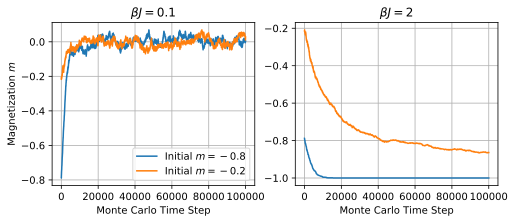

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(lat_1_b1, label=r'Initial $m=-0.8$')
ax[0].plot(lat_2_b1, label=r'Initial $m=-0.2$')

ax[1].plot(lat_1_b2)
ax[1].plot(lat_2_b2)

[a.grid() for a in ax.ravel()]
[a.set_xlabel('Monte Carlo Time Step') for a in ax.ravel()]
ax[0].set_ylabel('Magnetization $m$')

ax[0].set_title(r'$\beta J=0.1$')
ax[1].set_title(r'$\beta J=2$')

ax[0].legend()

plt.show()


Clealy the convergence to $0$ in the small $\beta J$ case is approximately equal, but the convergence to $-1$ in the large $\beta J$ case depends much more on initial conditions. 

## Finding Equilibrium Magnetization as a Function of Temperature

We can find the equilbrium magnetization by taking the mean value of the last 100000 points in each case.

In [15]:
def mean_mag(arr):
    return np.mean(arr[-100000::])

Compute the mean magnetization at different values of $\beta J$ for both initial confiditions.

In [16]:
df_p['mean_mag'] = df_p['Array'].apply(lambda x: mean_mag(x))
df_n['mean_mag'] = df_n['Array'].apply(lambda x: mean_mag(x))

Plot:

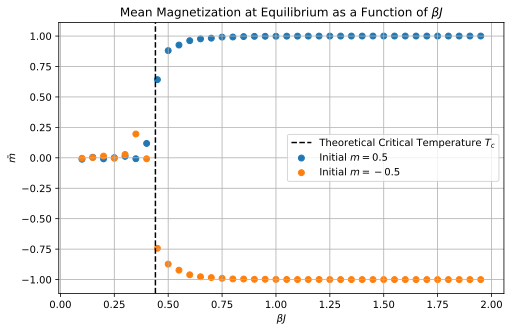

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.scatter(df_p['BetaJ'], df_p['mean_mag'], label='Initial $m=0.5$')
ax.scatter(df_n['BetaJ'], df_n['mean_mag'], label='Initial $m=-0.5$')

ax.grid()
ax.set_xlabel(r'$\beta J$')
ax.set_ylabel(r'$\bar{m}$')

ax.axvline(1/2.269, color='k', ls='--', label='Theoretical Critical Temperature $T_c$')
ax.legend()
ax.set_title(r'Mean Magnetization at Equilibrium as a Function of $\beta J$')

plt.show()

The black dotted line represents the place where $kT_c=2.269J$; the data points clearly show a phase transition at this location, as expected.